In [360]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

colors = ["#f94144","#f3722c","#f8961e","#f9844a","#f9c74f","#90be6d","#43aa8b","#4d908e","#577590","#277da1"]

# Information About Dataset

In [2]:
first_read = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [361]:
df = first_read.copy()

In [362]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [363]:
df.tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [365]:
df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [366]:
df.shape

(541910, 8)

# Missing Values

In [367]:
df.count()

Invoice        541910
StockCode      541910
Description    540456
Quantity       541910
InvoiceDate    541910
Price          541910
Customer ID    406830
Country        541910
dtype: int64

In [368]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

<AxesSubplot:>

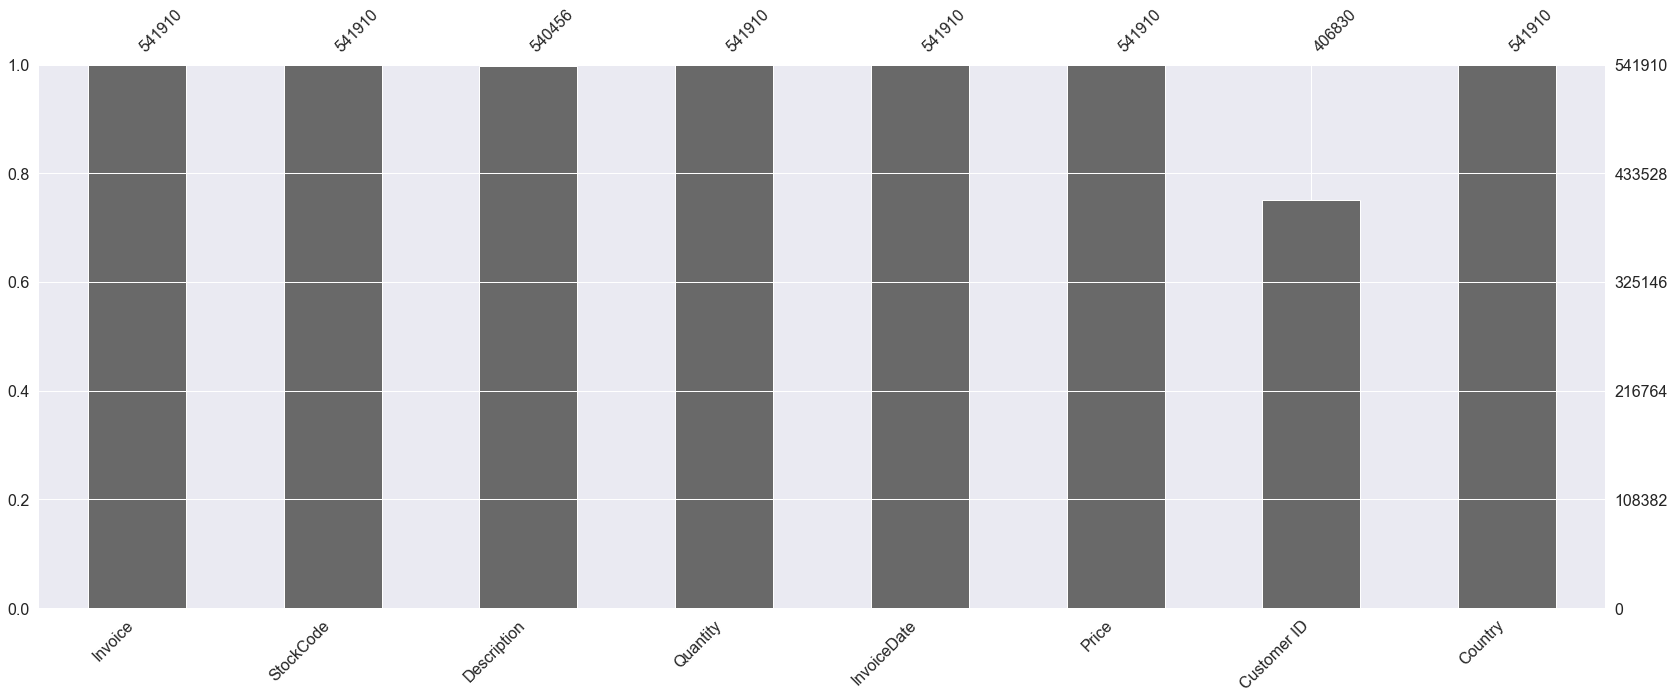

In [369]:
import missingno as msno
msno.bar(df)

<AxesSubplot:>

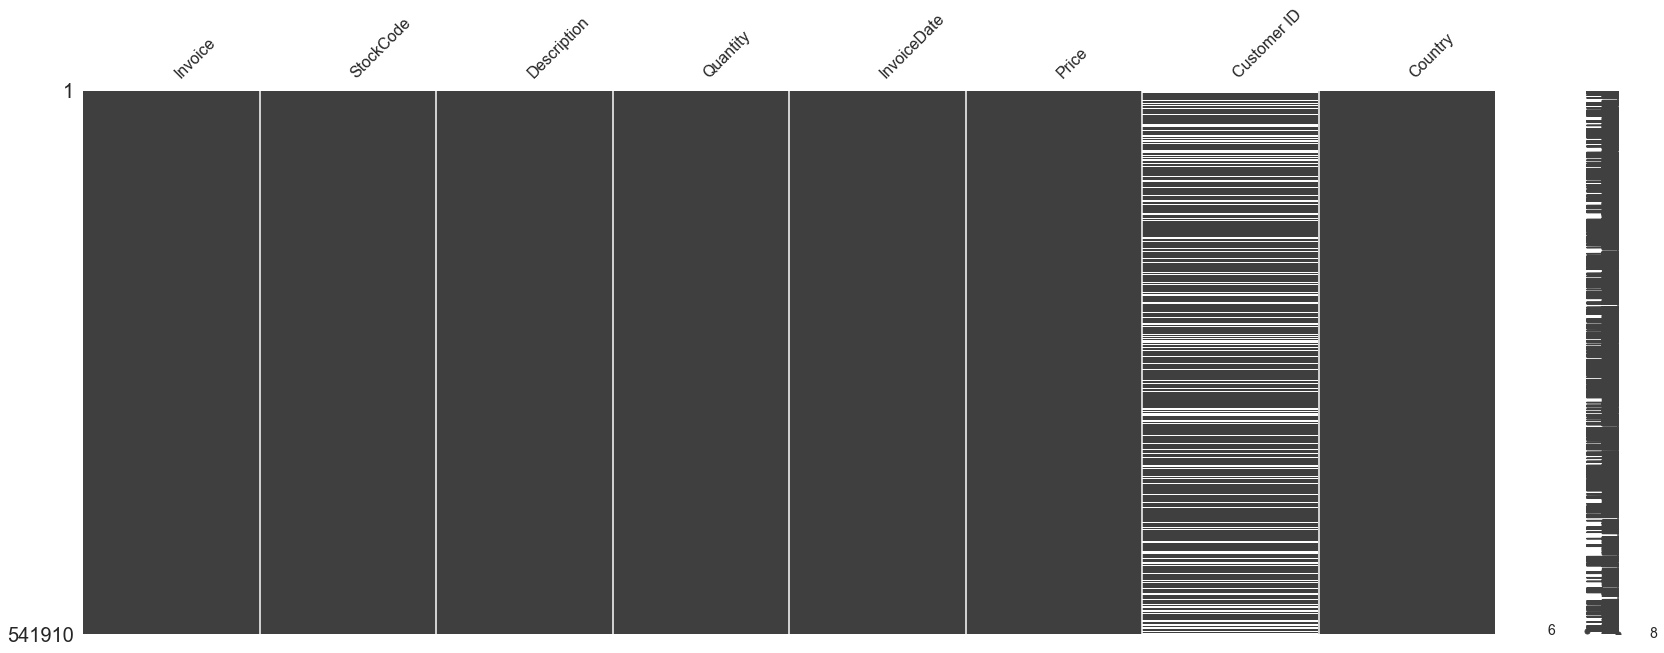

In [370]:
msno.matrix(df)

In [371]:
df.dropna(inplace = True)

In [372]:
df.isnull().sum().sum()

0

In [373]:
df.count()

Invoice        406830
StockCode      406830
Description    406830
Quantity       406830
InvoiceDate    406830
Price          406830
Customer ID    406830
Country        406830
dtype: int64

In [374]:
df = df[~df["Invoice"].str.contains("C", na = False)]

# Unique Values

In [375]:
columns = ['Invoice', 'StockCode', 'Description', 'Customer ID', 'Country']

def uniques(columns):
    column_names = []
    column_names = columns
    
    for i in column_names:
        print(f'Column name: {i}, Unique Values Count: {df[i].nunique()}')

In [376]:
uniques(columns)

Column name: Invoice, Unique Values Count: 18536
Column name: StockCode, Unique Values Count: 3665
Column name: Description, Unique Values Count: 3877
Column name: Customer ID, Unique Values Count: 4339
Column name: Country, Unique Values Count: 37


# Prodcut Analysis

In [377]:
df['Description'].value_counts().head(5)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
Name: Description, dtype: int64

<Figure size 2000x1500 with 0 Axes>

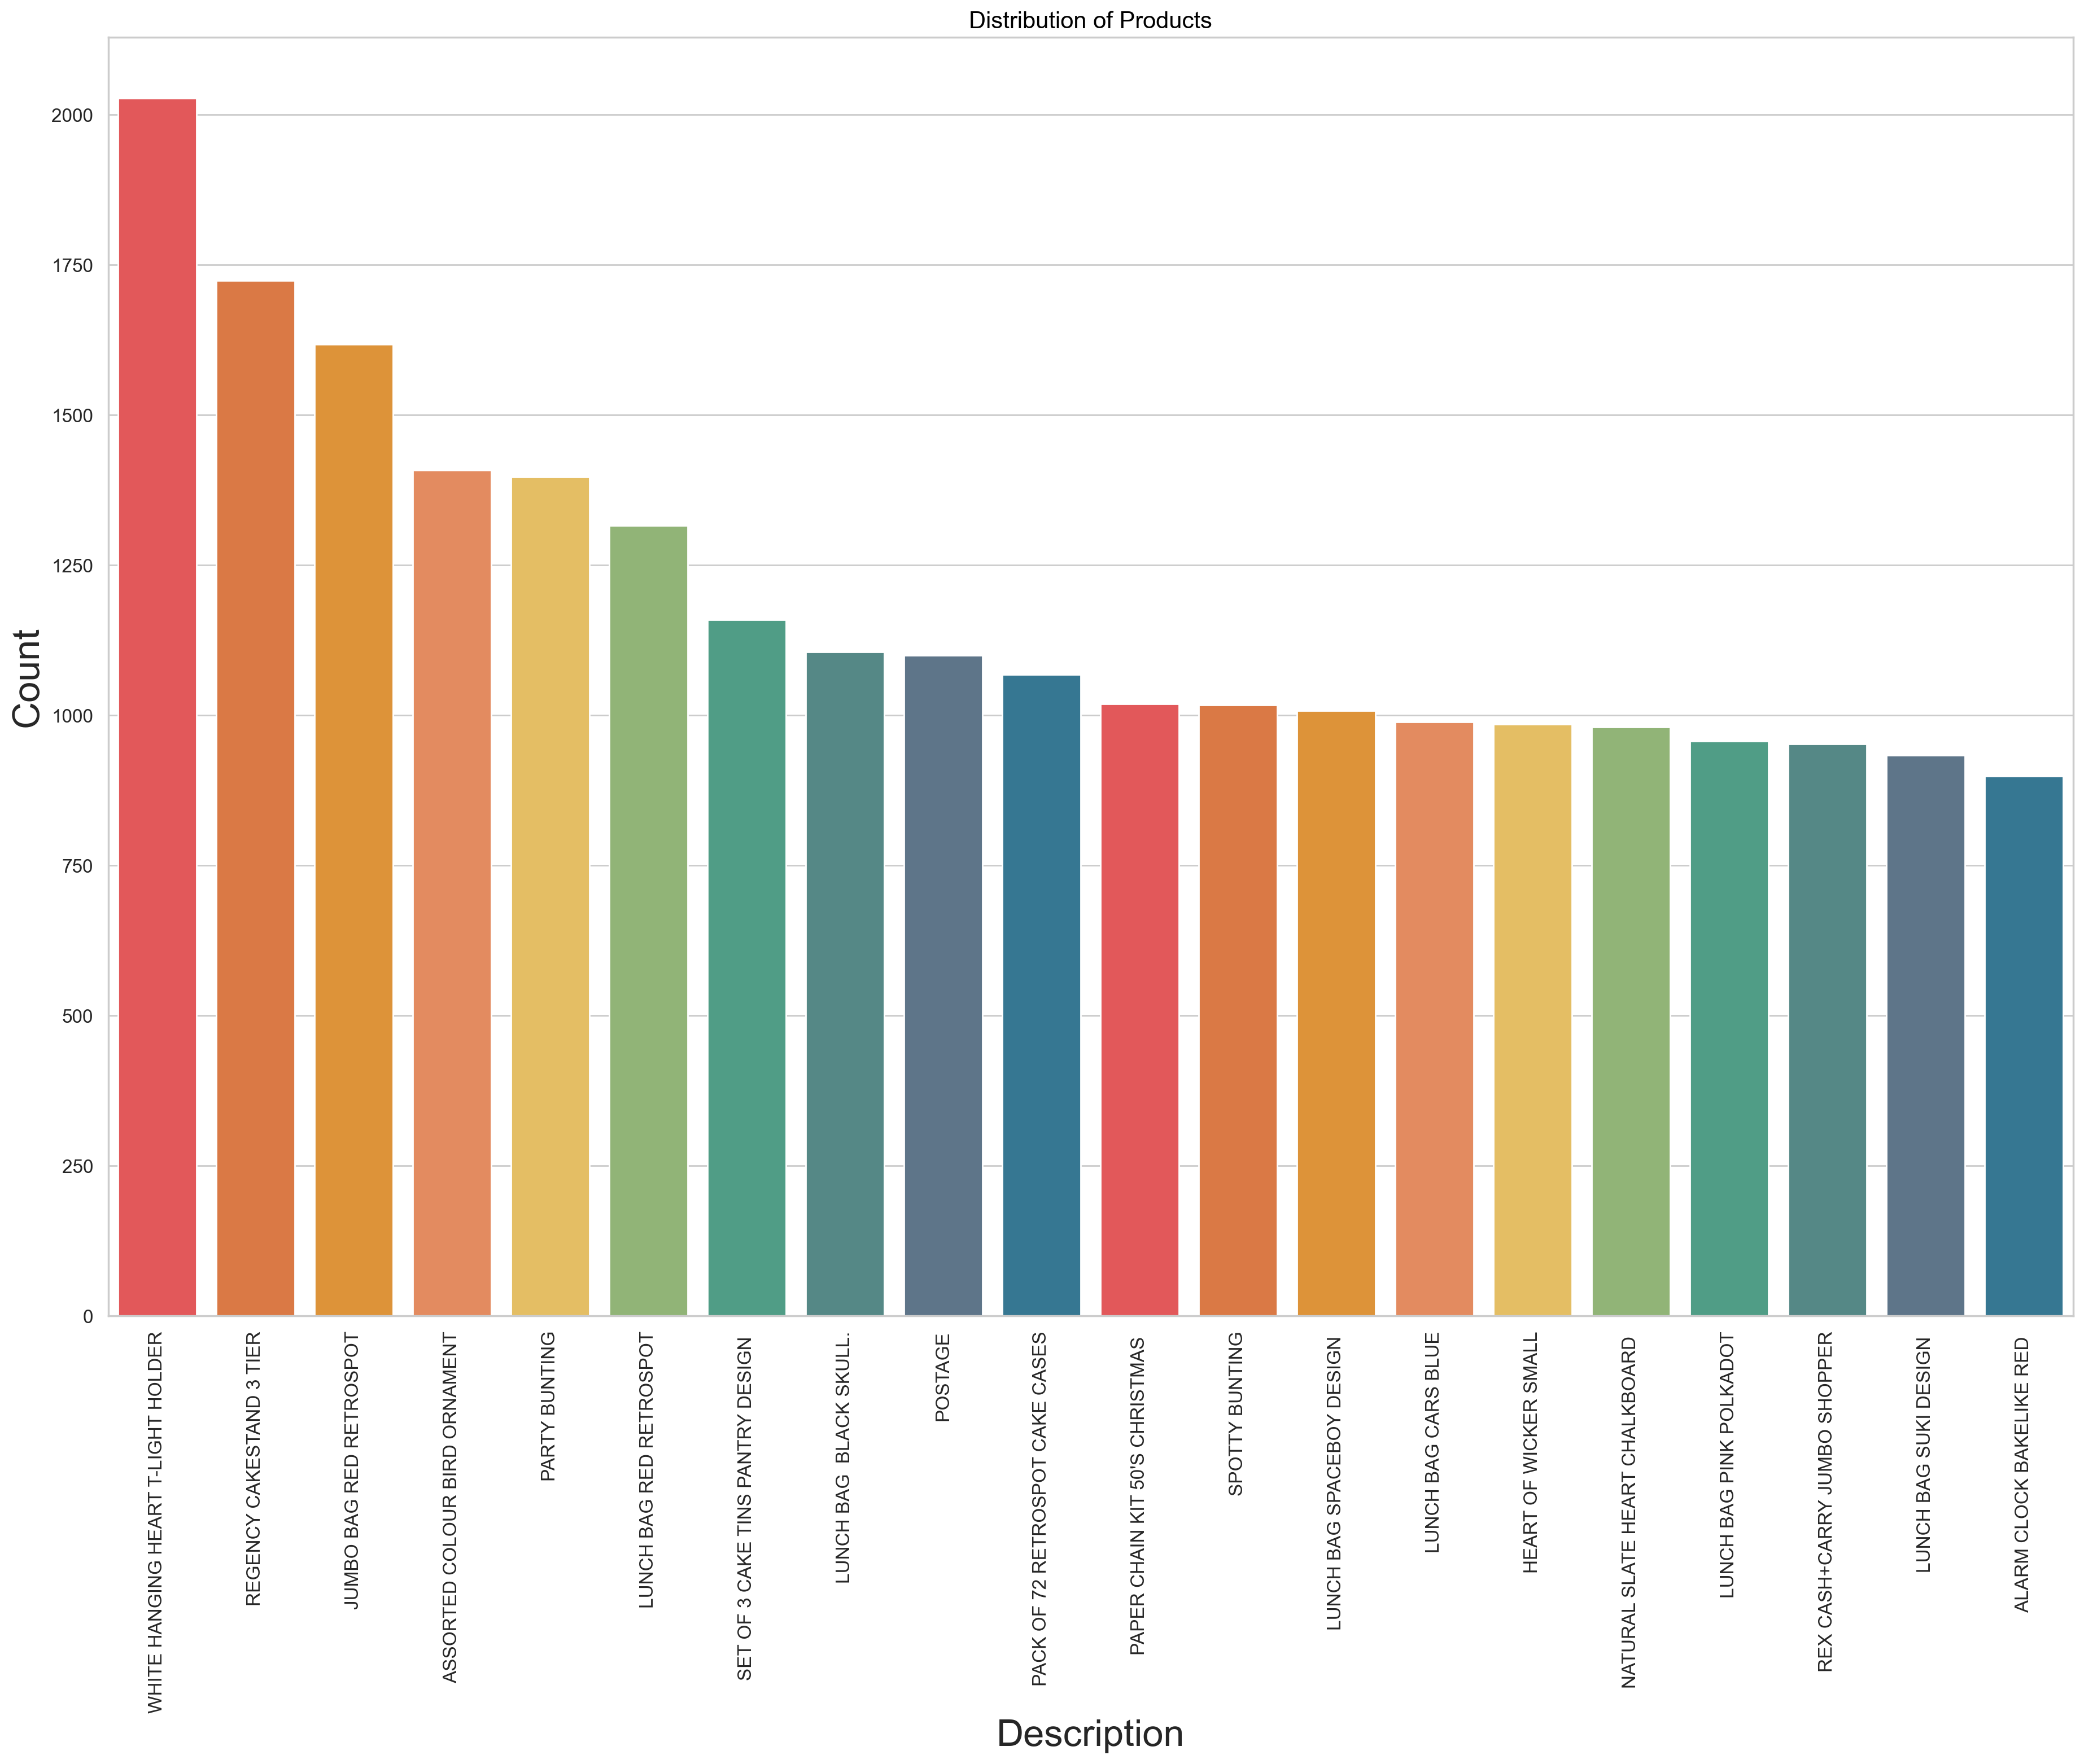

In [378]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15), dpi = 100)

counts = df['Description'].value_counts().head(20)

plt.figure(figsize=(20,15), dpi = 200)
sns.barplot(x=counts.index, y=counts.values, palette=colors)

plt.ylabel('Count', style = 'normal', size = 24)
plt.xlabel('Description', style = 'normal', size = 24)

plt.xticks(rotation = 90, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Distribution of Products',color = 'black',fontsize=15)
plt.show()

# Calculating TotalPrice

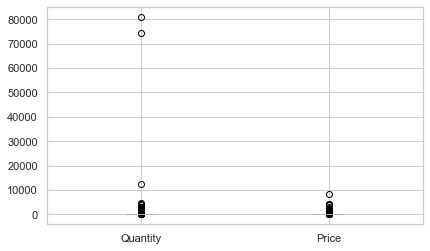

In [379]:
df[["Quantity", "Price"]].boxplot();

In [380]:
df['TotalPrice'] = df['Quantity'] * df['Price']
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Total Turnover by Product

In [381]:
df.groupby('Description').agg({'TotalPrice': 'sum'}).sort_values('TotalPrice', ascending = False).head()

,TotalPrice
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73


In [382]:
df.groupby('Description').agg({'TotalPrice': 'sum'}).sort_values('TotalPrice', ascending = True).head()

,TotalPrice
Description,
PADS TO MATCH ALL CUSHIONS,0.003
HEN HOUSE W CHICK IN NEST,0.420
SET 12 COLOURING PENCILS DOILEY,0.650
VINTAGE BLUE TINSEL REEL,0.840
PINK CRYSTAL GUITAR PHONE CHARM,0.850


## Total Turnover by Country

In [383]:
df.groupby('Country').agg({'TotalPrice': 'sum'}).sort_values('TotalPrice', ascending = False).head()

,TotalPrice
Country,
United Kingdom,7.308392e+06
Netherlands,2.854463e+05
EIRE,2.655459e+05
Germany,2.288671e+05
France,2.090420e+05


In [384]:
df.groupby('Country').agg({'TotalPrice': 'sum'}).sort_values('TotalPrice', ascending = True).head()

,TotalPrice
Country,
Saudi Arabia,145.92
Bahrain,548.40
Czech Republic,826.74
RSA,1002.31
Brazil,1143.60


## Total Turnover by Invoice

In [385]:
df.groupby('Invoice').agg({'TotalPrice': 'sum'}).sort_values('TotalPrice', ascending = False).head()

,TotalPrice
Invoice,
581483,168469.60
541431,77183.60
556444,38970.00
567423,31698.16
556917,22775.93


In [386]:
df.groupby('Invoice').agg({'TotalPrice': 'sum'}).sort_values('TotalPrice', ascending = True).head()

,TotalPrice
Invoice,
568384,0.00
564651,0.00
543599,0.00
578841,0.00
570554,0.38


## Total Turnover by Customer

In [387]:
df.groupby('Customer ID').agg({'TotalPrice': 'sum'}).sort_values('TotalPrice', ascending = False).head()

,TotalPrice
Customer ID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06


In [388]:
df.groupby('Customer ID').agg({'TotalPrice': 'sum'}).sort_values('TotalPrice', ascending = True).head()

,TotalPrice
Customer ID,
13256.0,0.00
16738.0,3.75
14792.0,6.20
16454.0,6.90
17956.0,12.75


# RFM

In [389]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [390]:
import datetime as dt

date = dt.datetime(2011,12,11)
date

datetime.datetime(2011, 12, 11, 0, 0)

## Recency

In [391]:
recency = date - df.groupby('Customer ID').agg({'InvoiceDate':'max'}).rename(columns = {"InvoiceDate":"Recency"})
recency.head(10)

,Recency
Customer ID,
12346.0,326 days 13:59:00
12347.0,3 days 08:08:00
12348.0,76 days 10:47:00
12349.0,19 days 14:09:00
12350.0,311 days 07:59:00
12352.0,37 days 09:23:00
12353.0,205 days 06:13:00
12354.0,233 days 10:49:00
12355.0,215 days 10:11:00


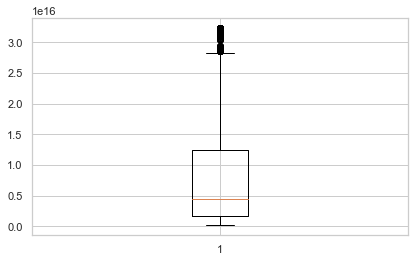

In [392]:
plt.boxplot(recency);

In [393]:
recency = recency['Recency'].dt.days
recency.head()

Customer ID
12346.0    326
12347.0      3
12348.0     76
12349.0     19
12350.0    311
Name: Recency, dtype: int64

## Frequency

In [394]:
frequency = df.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
frequency.head(10)

,Frequency
Customer ID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1
12352.0,8
12353.0,1
12354.0,1
12355.0,1


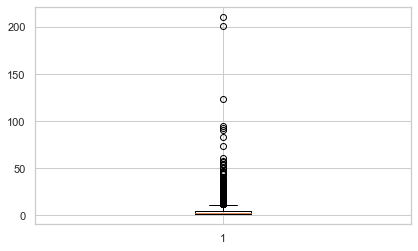

In [395]:
plt.boxplot(frequency);

## Monetary

In [396]:
monetary = df.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})
monetary.head(10)

,Monetary
Customer ID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
12352.0,2506.04
12353.0,89.00
12354.0,1079.40
12355.0,459.40


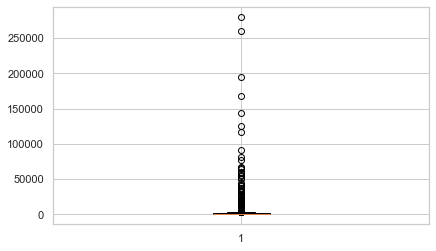

In [397]:
plt.boxplot(monetary);

## Concat

In [398]:
rfm = pd.concat([recency, frequency, monetary],  axis=1)

rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [399]:
rfm.count()

Recency      4339
Frequency    4339
Monetary     4339
dtype: int64

In [400]:
rfm = rfm[rfm['Monetary'] > 0]

# Creating RFM Scores

In [401]:
rfm["recency_score"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])

rfm["frequency_score"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm["monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm.head(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
Customer ID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,3,7,4310.00,5,5,5
12348.0,76,4,1797.24,2,4,4
12349.0,19,1,1757.55,4,1,4
12350.0,311,1,334.40,1,1,2
12352.0,37,8,2506.04,3,5,5
12353.0,205,1,89.00,1,1,1
12354.0,233,1,1079.40,1,1,4
12355.0,215,1,459.40,1,1,2


In [402]:
rfm["RfScore"] = (rfm['recency_score'].astype(str) + 
                   rfm['frequency_score'].astype(str))

rfm.head(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RfScore
Customer ID,,,,,,,
12346.0,326,1,77183.60,1,1,5,11
12347.0,3,7,4310.00,5,5,5,55
12348.0,76,4,1797.24,2,4,4,24
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11
12352.0,37,8,2506.04,3,5,5,35
12353.0,205,1,89.00,1,1,1,11
12354.0,233,1,1079.40,1,1,4,11
12355.0,215,1,459.40,1,1,2,11


In [403]:
rfm["RfmScore"] = (rfm['recency_score'].astype(str) + 
                   rfm['frequency_score'].astype(str) + 
                   rfm['monetary_score'].astype(str))

rfm.head(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RfScore,RfmScore
Customer ID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,11,115
12347.0,3,7,4310.00,5,5,5,55,555
12348.0,76,4,1797.24,2,4,4,24,244
12349.0,19,1,1757.55,4,1,4,41,414
12350.0,311,1,334.40,1,1,2,11,112
12352.0,37,8,2506.04,3,5,5,35,355
12353.0,205,1,89.00,1,1,1,11,111
12354.0,233,1,1079.40,1,1,4,11,114
12355.0,215,1,459.40,1,1,2,11,112


# Segmentation

<table class="table table-bordered table-hover table-striped table-responsive">
<thead>
<tr>
<th align="left">Segment</th>
<th align="left">Description</th>
</tr>
</thead>
<tbody>
<tr>
<td align="left">Champions</td>
<td align="left">Bought recently, buy often and spend the most</td>
</tr>
<tr>
<td align="left">Loyal Customers</td>
<td align="left">Buy on a regular basis. Responsive to promotions.</td>
</tr>
<tr>
<td align="left">Potential Loyalist</td>
<td align="left">Recent customers with average frequency.</td>
</tr>
<tr>
<td align="left">Recent Customers</td>
<td align="left">Bought most recently, but not often.</td>
</tr>
<tr>
<td align="left">Promising</td>
<td align="left">Recent shoppers, but haven’t spent much.</td>
</tr>
<tr>
<td align="left">Customers Needing Attention</td>
<td align="left">Above average recency, frequency and monetary values. May not have bought very recently though.</td>
</tr>
<tr>
<td align="left">About To Sleep</td>
<td align="left">Below average recency and frequency. Will lose them if not reactivated.</td>
</tr>
<tr>
<td align="left">At Risk</td>
<td align="left">Purchased often but a long time ago. Need to bring them back!</td>
</tr>
<tr>
<td align="left">Can’t Lose Them</td>
<td align="left">Used to purchase frequently but haven’t returned for a long time.</td>
</tr>
<tr>
<td align="left">Hibernating</td>
<td align="left">Last purchase was long back and low number of orders. May be lost.</td>
</tr>
</tbody>
</table>

In [404]:
segmentation_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [405]:
rfm['Segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segmentation_map, regex=True)

rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RfScore,RfmScore,Segment
Customer ID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,11,115,hibernating
12347.0,3,7,4310.00,5,5,5,55,555,champions
12348.0,76,4,1797.24,2,4,4,24,244,at_risk
12349.0,19,1,1757.55,4,1,4,41,414,promising
12350.0,311,1,334.40,1,1,2,11,112,hibernating


In [406]:
rfm[['Recency','Frequency','Monetary','Segment']].groupby('Segment').agg({'max','min','mean','count'})

Recency                       Frequency                   \
                        max        mean count min       max       mean count   
Segment                                                                        
about_to_sleep           72   53.365439   353  34         2   1.161473   353   
at_risk                 374  154.038721   594  73         5   2.867003   594   
cant_loose              373  132.046875    64  73        33   8.312500    64   
champions                13    6.367089   632   1       211  12.340190   632   
hibernating             374  217.658559  1069  73         2   1.100094  1069   
loyal_customers          72   33.685366   820  15        61   6.441463   820   
need_attention           72   52.271739   184  34         3   2.320652   184   
new_customers            13    7.428571    42   1         1   1.000000    42   
potential_loyalists      33   17.368313   486   1         3   2.012346   486   
promising                33   23.510638    94  15         1   1.000000    94   

                          Monetary                             
                    min        max         mean count     min  
Segment                                                        
about_to_sleep        1    6207.67   472.548640   353    6.20  
at_risk               2   44534.30  1079.814126   594   52.00  
cant_loose            6   10254.18  2791.010625    64   70.02  
champions             3  280206.02  6866.779209   632  201.12  
hibernating           1   77183.60   488.858711  1069    3.75  
loyal_customers       3  124914.53  2862.890830   820   36.56  
need_attention        2   12601.83   894.490272   184    6.90  
new_customers         1    3861.00   388.212857    42   89.94  
potential_loyalists   1  168472.50  1041.335720   486   20.80  
promising             1    1757.55   294.007979    94   30.00

In [407]:
rfm_counts = rfm[['Recency','Segment']].groupby('Segment').agg({'count'}).rename(columns={"Recency":"Count"})

In [408]:
rfm_counts.values

array([[ 353],
       [ 594],
       [  64],
       [ 632],
       [1069],
       [ 820],
       [ 184],
       [  42],
       [ 486],
       [  94]], dtype=int64)

In [409]:
rfm['Recency']

Customer ID
12346.0    326
12347.0      3
12348.0     76
12349.0     19
12350.0    311
          ... 
18280.0    278
18281.0    181
18282.0      8
18283.0      4
18287.0     43
Name: Recency, Length: 4338, dtype: int64

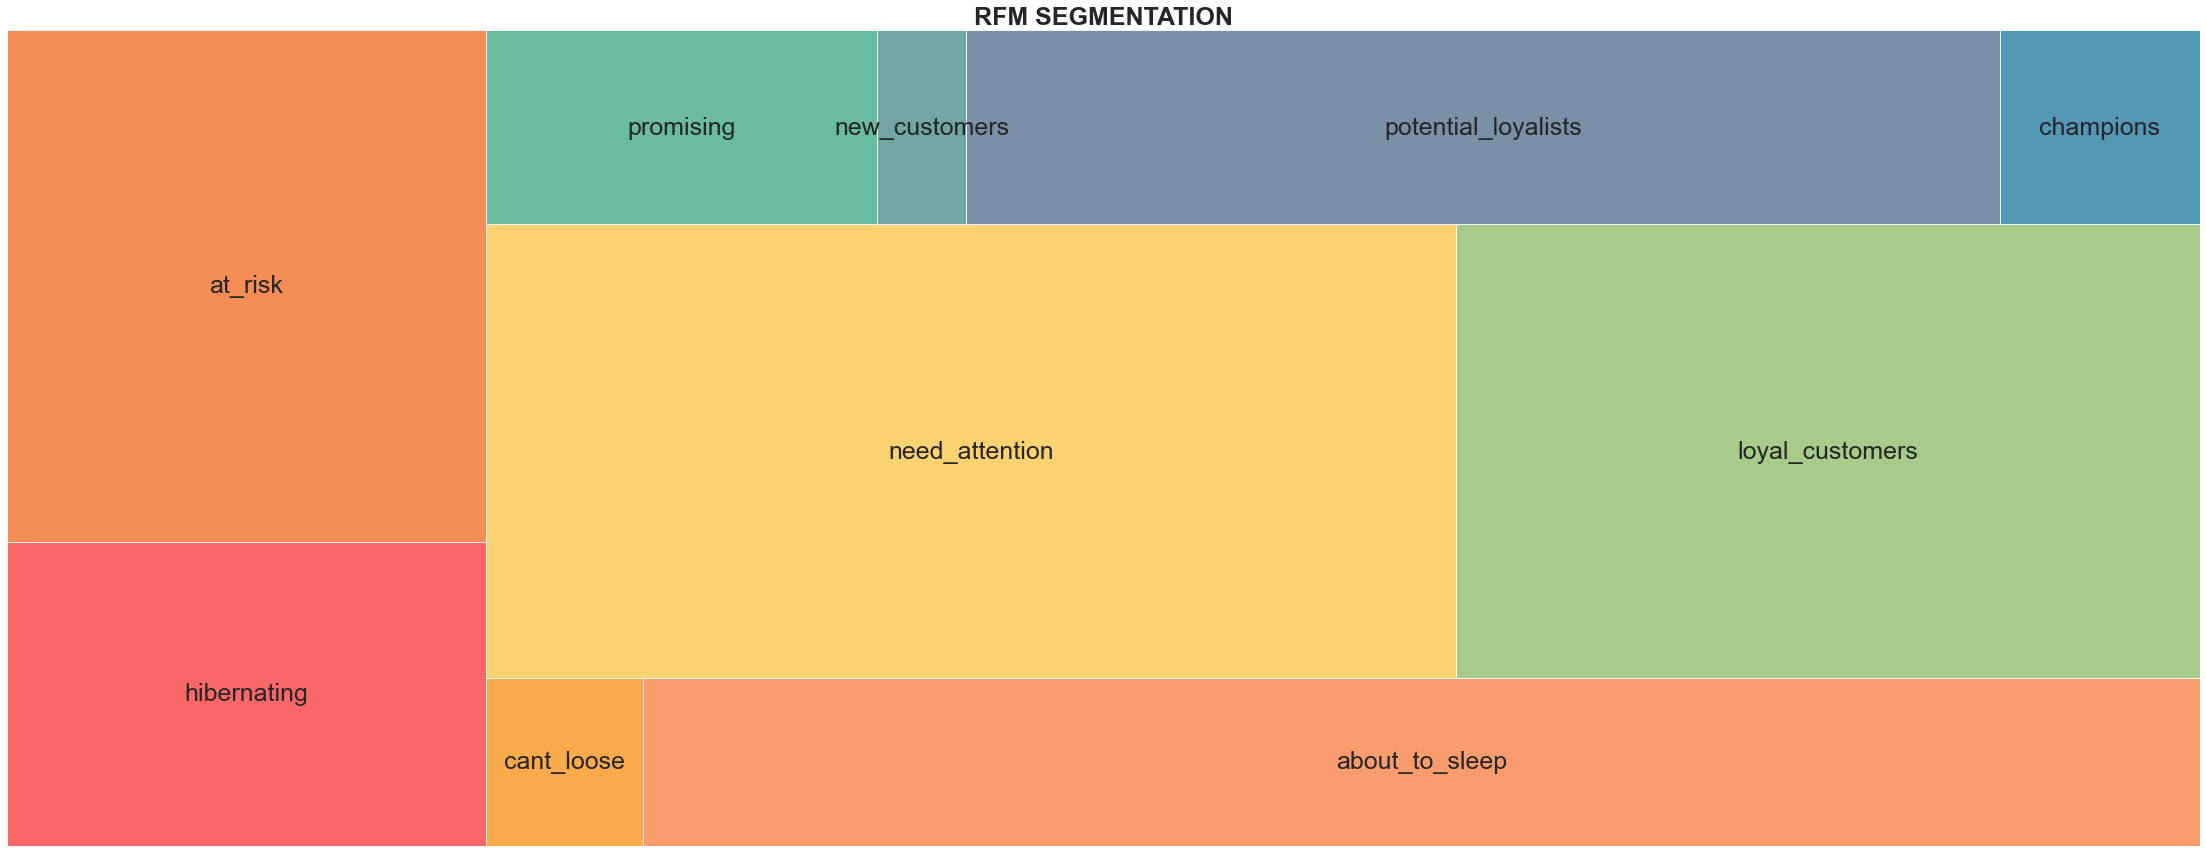

In [410]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(35, 15)

squarify.plot(sizes=rfm_counts.values, 
              label=['hibernating',
                     'at_risk',
                     'cant_loose',
                     'about_to_sleep',
                     'need_attention', 
                     'loyal_customers',
                    'promising',
                    'new_customers',
                    'potential_loyalists',
                     'champions'], 
              alpha=0.8, color = colors, text_kwargs={'fontsize':25})
             
plt.title('RFM SEGMENTATION', fontsize = 25, fontweight = 'bold')
plt.axis('off')
plt.show()

In [411]:
segment_counts = rfm['Segment'].value_counts()
segment_percentages = (rfm['Segment'].value_counts() / rfm['Segment'].value_counts().sum()) * 100
table_cv = pd.DataFrame({'Count': segment_counts, 'Percentage': segment_percentages})
segment_names = table_cv.index
table_cv

,Count,Percentage
hibernating,1069,24.642692
loyal_customers,820,18.902720
champions,632,14.568926
at_risk,594,13.692946
potential_loyalists,486,11.203320
about_to_sleep,353,8.137391
need_attention,184,4.241586
promising,94,2.166897
cant_loose,64,1.475334
new_customers,42,0.968188


Text(0.5, 1.0, 'Distribution of Segments')

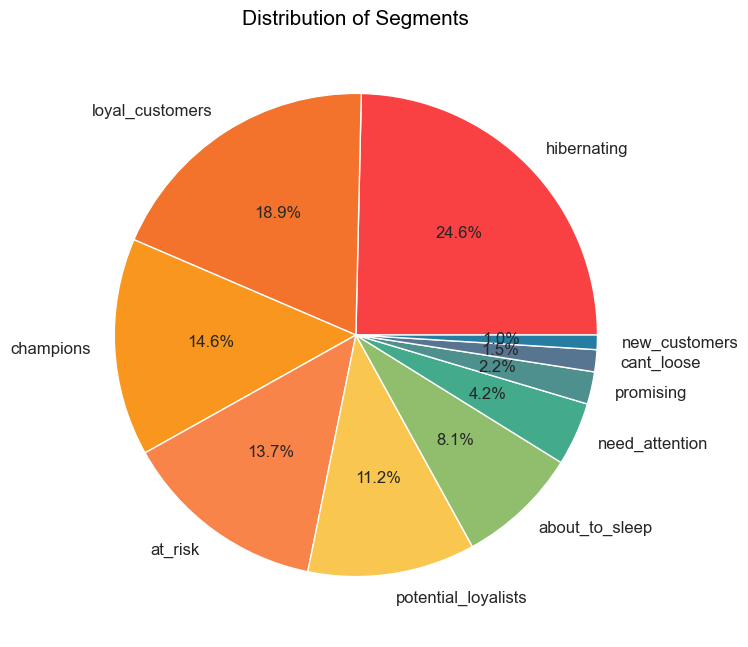

In [412]:
plt.figure(figsize = (8,8), dpi = 100)
plt.pie(table_cv['Percentage'], labels=segment_names, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 12})
plt.title("Distribution of Segments",color = 'black',fontsize = 15)

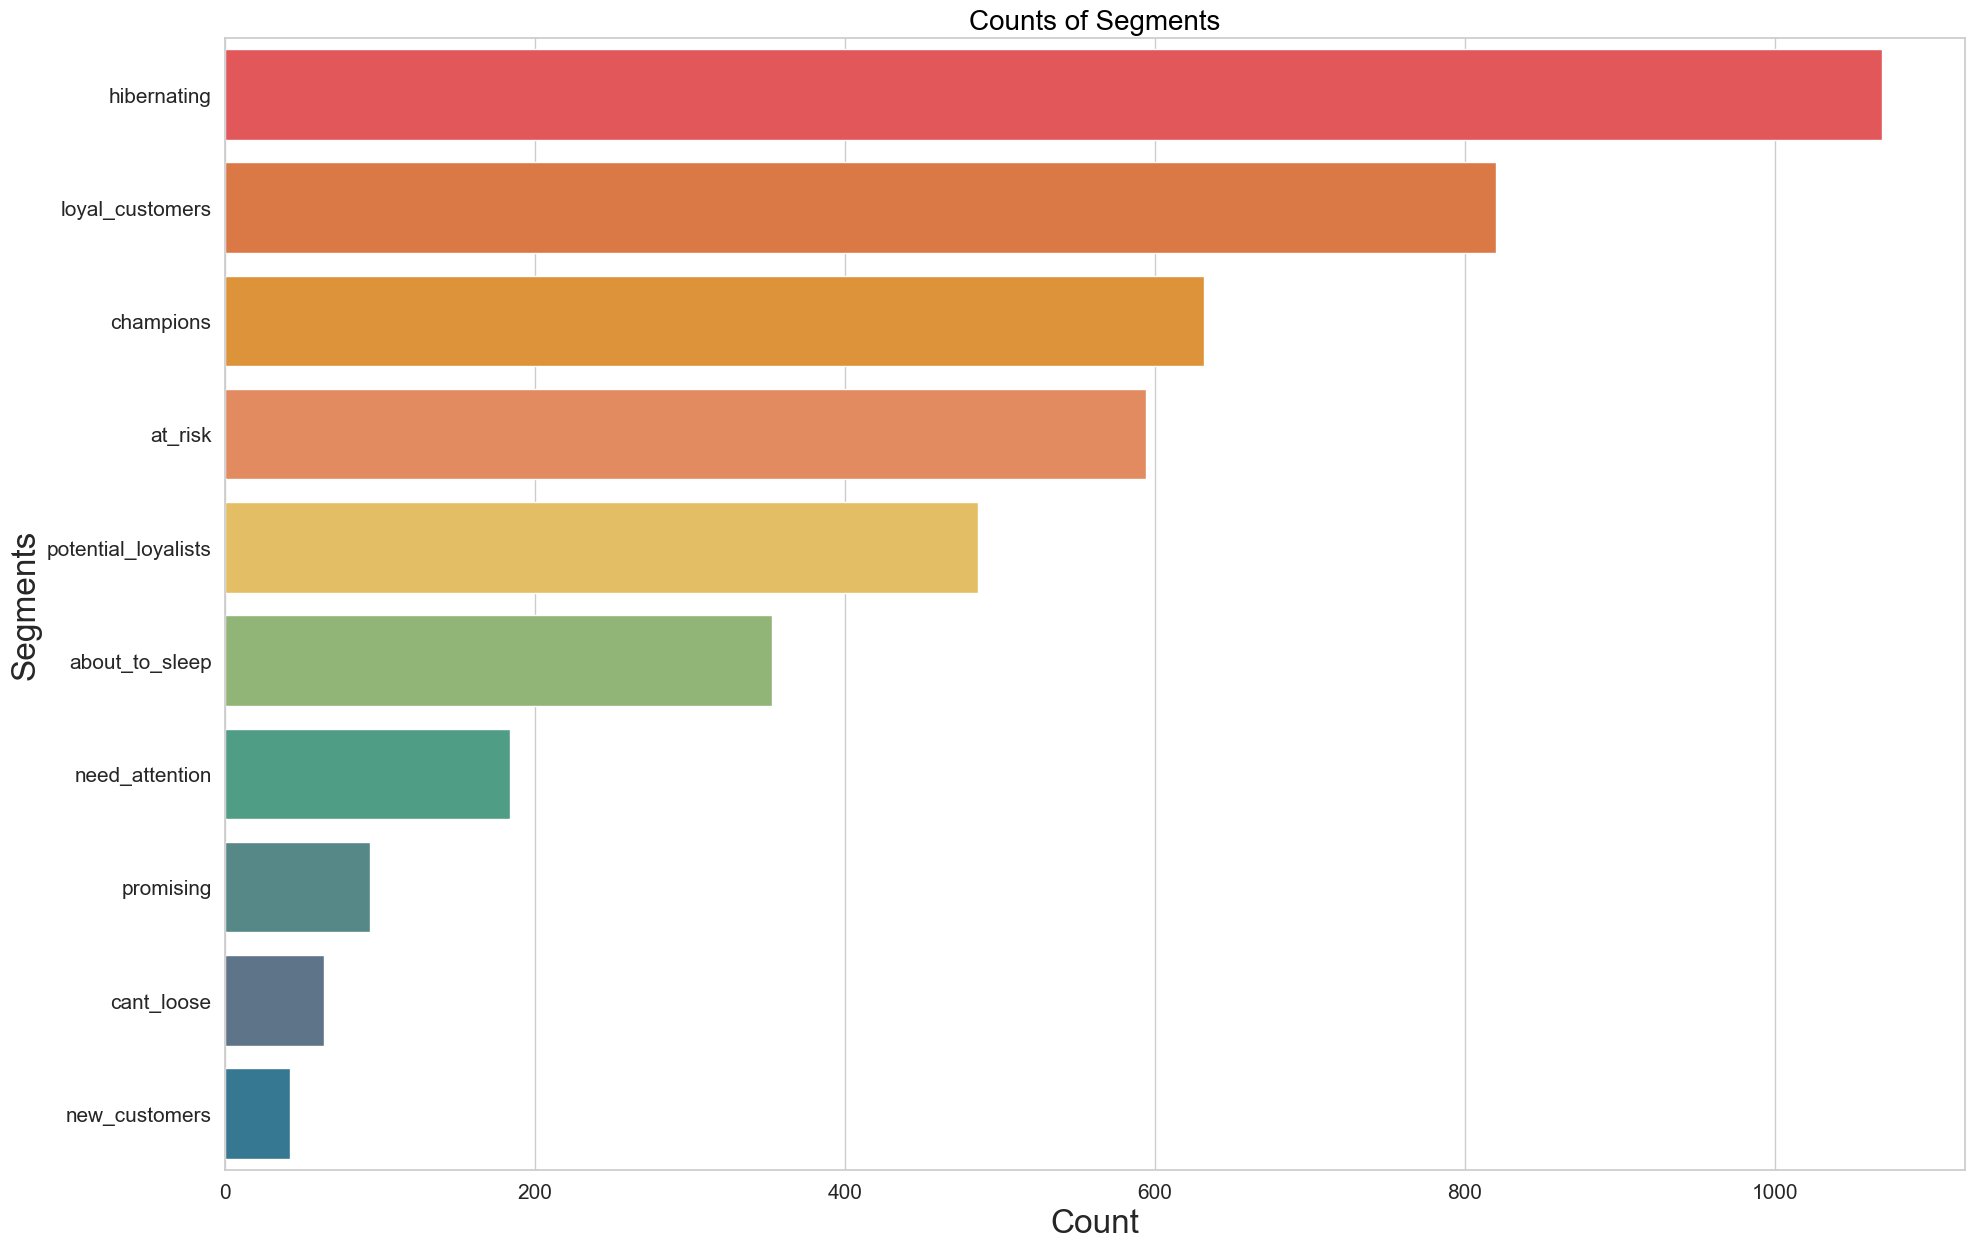

In [413]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15), dpi = 100)
sns.barplot(x=segment_counts, y=segment_names, palette=colors)

plt.ylabel('Segments', style = 'normal', size = 24)
plt.xlabel('Count', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 15)
plt.yticks(rotation = 0, size = 15)

plt.title('Counts of Segments', color = 'black', fontsize=20)
plt.show()

In [414]:
to_scale = rfm[['Recency', 'Frequency']]
to_scale.reset_index(level = 0, inplace = True)
to_scale

,Customer ID,Recency,Frequency
0,12346.0,326,1
1,12347.0,3,7
2,12348.0,76,4
3,12349.0,19,1
4,12350.0,311,1
...,...,...,...
4333,18280.0,278,1
4334,18281.0,181,1
4335,18282.0,8,2
4336,18283.0,4,16


In [415]:
log_rec = np.log(to_scale["Recency"])
log_fre = np.log(to_scale["Frequency"])

In [416]:
to_scale['Recency'] = log_rec
to_scale['Frequency'] = log_fre
to_scale

,Customer ID,Recency,Frequency
0,12346.0,5.786897,0.000000
1,12347.0,1.098612,1.945910
2,12348.0,4.330733,1.386294
3,12349.0,2.944439,0.000000
4,12350.0,5.739793,0.000000
...,...,...,...
4333,18280.0,5.627621,0.000000
4334,18281.0,5.198497,0.000000
4335,18282.0,2.079442,0.693147
4336,18283.0,1.386294,2.772589


In [417]:
to_scale = to_scale.merge(rfm, left_on = 'Customer ID', right_on = 'Customer ID', how = 'left')

In [418]:
to_scale

,Customer ID,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,recency_score,frequency_score,monetary_score,RfScore,RfmScore,Segment
0,12346.0,5.786897,0.000000,326,1,77183.60,1,1,5,11,115,hibernating
1,12347.0,1.098612,1.945910,3,7,4310.00,5,5,5,55,555,champions
2,12348.0,4.330733,1.386294,76,4,1797.24,2,4,4,24,244,at_risk
3,12349.0,2.944439,0.000000,19,1,1757.55,4,1,4,41,414,promising
4,12350.0,5.739793,0.000000,311,1,334.40,1,1,2,11,112,hibernating
...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,5.627621,0.000000,278,1,180.60,1,2,1,12,121,hibernating
4334,18281.0,5.198497,0.000000,181,1,80.82,1,2,1,12,121,hibernating
4335,18282.0,2.079442,0.693147,8,2,178.05,5,3,1,53,531,potential_loyalists
4336,18283.0,1.386294,2.772589,4,16,2094.88,5,5,5,55,555,champions


<AxesSubplot:xlabel='Frequency_x', ylabel='Recency_x'>

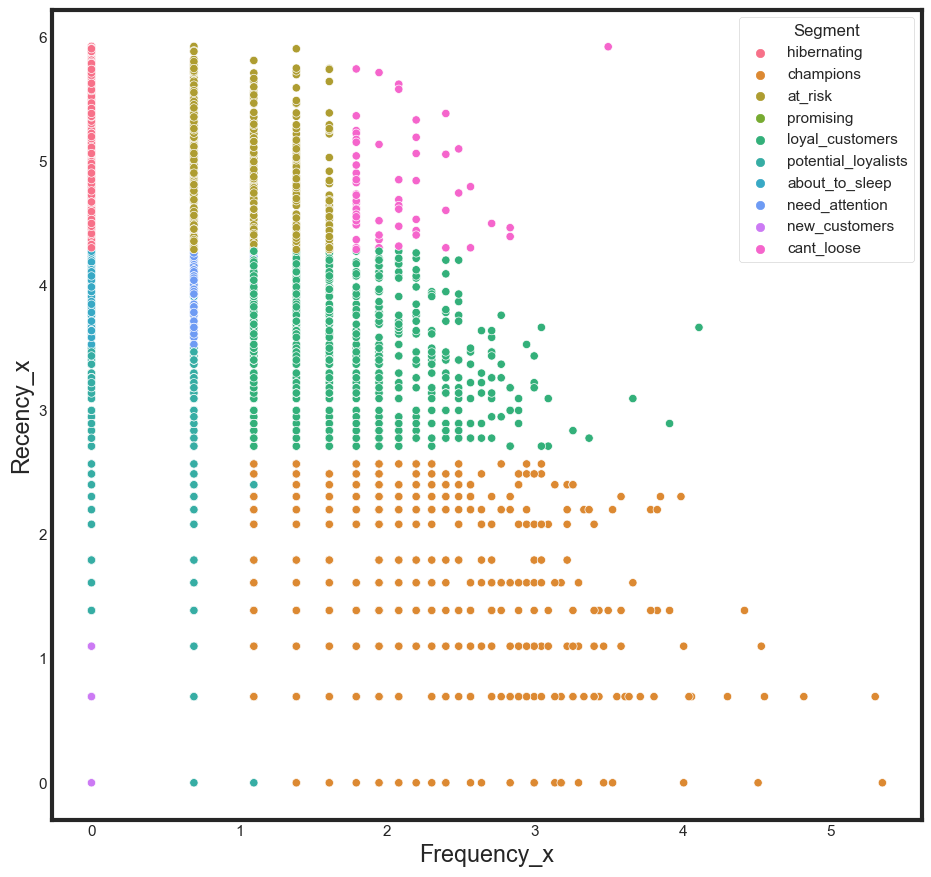

In [440]:
sns.set_style('white')
plt.figure(figsize=(10,10), dpi = 100)
sns.scatterplot(x="Frequency_x", y="Recency_x",hue="Segment", data=to_scale)

## Loyal Customers

In [420]:
rfm[rfm["Segment"]=="loyal_customers"].index

Float64Index([12352.0, 12359.0, 12370.0, 12380.0, 12388.0, 12395.0, 12407.0,
              12408.0, 12415.0, 12421.0,
              ...
              18204.0, 18211.0, 18221.0, 18226.0, 18235.0, 18236.0, 18257.0,
              18259.0, 18263.0, 18287.0],
             dtype='float64', name='Customer ID', length=820)

In [421]:
df_loyalCustomers = pd.DataFrame()
df_loyalCustomers["Need_Attention_ID"] = rfm[rfm["Segment"] == "loyal_customers"].index

df_loyalCustomers.to_csv("loyal_customers.csv")

# Anomaly Detection

In [423]:
#This code is retrieved from here: https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda#Introduction
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [424]:
columns = ['Recency', 'Frequency']
rfm.loc[detect_outliers(rfm,columns)]

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RfScore,RfmScore,Segment
Customer ID,,,,,,,,,


In [425]:
# drop outliers
rfm = rfm.drop(detect_outliers(rfm,columns),axis = 0).reset_index(drop = True)

# Scaling

In [426]:
rfm_df = to_scale[['Recency_x', 'Frequency_x']]

In [427]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

rfm_scaled = sc.fit_transform(rfm_df)

In [428]:
rfm_scaled

array([[0.97681423, 0.        ],
       [0.18544309, 0.36359524],
       [0.73101728, 0.25903048],
       ...,
       [0.35100469, 0.12951524],
       [0.23400312, 0.51806095],
       [0.63488145, 0.2052768 ]])

# K-Means

In [446]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [447]:
kmeans.labels_

array([0, 3, 1, ..., 3, 3, 1])

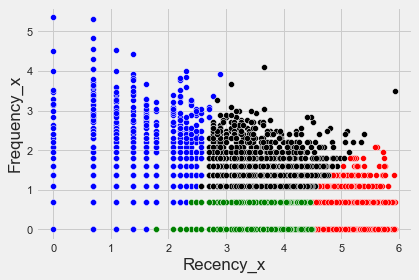

In [448]:
import warnings
warnings.filterwarnings('ignore')
sns.scatterplot(filtered_label0['Recency_x'] , filtered_label0['Frequency_x'], color = 'red');
sns.scatterplot(filtered_label1['Recency_x'] , filtered_label1['Frequency_x'], color = 'blue');
sns.scatterplot(filtered_label2['Recency_x'] , filtered_label2['Frequency_x'], color = 'green');
sns.scatterplot(filtered_label3['Recency_x'] , filtered_label3['Frequency_x'], color = 'black');

In [449]:
rfm_scaled

array([[0.97681423, 0.        ],
       [0.18544309, 0.36359524],
       [0.73101728, 0.25903048],
       ...,
       [0.35100469, 0.12951524],
       [0.23400312, 0.51806095],
       [0.63488145, 0.2052768 ]])

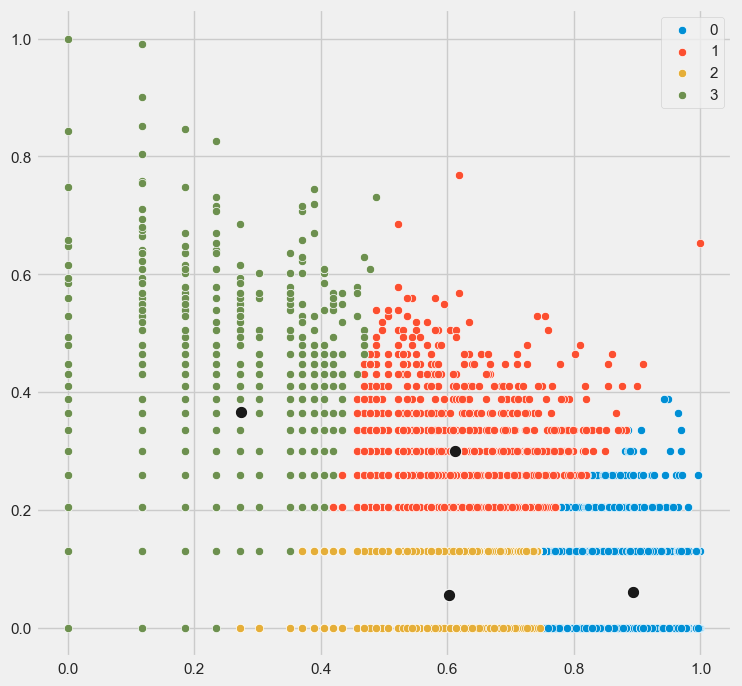

In [450]:
style.use("fivethirtyeight")
plt.figure(figsize=(8,8), dpi = 100)

#Getting the Centroids
label = kmeans.labels_
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    sns.scatterplot(rfm_scaled[label == i , 0] , rfm_scaled[label == i , 1] , label = i)
sns.scatterplot(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
style.use("fivethirtyeight")
plt.show()

## Elbow Method

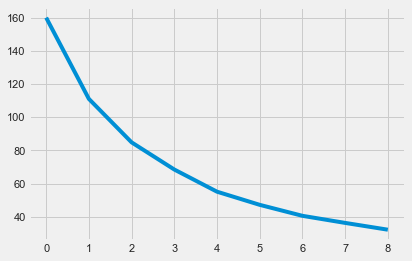

In [451]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(rfm_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
style.use("fivethirtyeight")
plt.plot(ssd)

## Silhouette Analysis

In [452]:
# silhouette analysis

from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.46913825660244807
For n_clusters=3, the silhouette score is 0.39062097970957127
For n_clusters=4, the silhouette score is 0.4062738148969788
For n_clusters=5, the silhouette score is 0.40284426788913374
For n_clusters=6, the silhouette score is 0.4133335823179834
For n_clusters=7, the silhouette score is 0.40660988171389173
For n_clusters=8, the silhouette score is 0.415710738844222
For n_clusters=9, the silhouette score is 0.4187474378515667
For n_clusters=10, the silhouette score is 0.43667291958302007


For n_clusters = 2 The average silhouette_score is : 0.4689096508333116
For n_clusters = 3 The average silhouette_score is : 0.3904749355336368
For n_clusters = 4 The average silhouette_score is : 0.40545078676018986
For n_clusters = 5 The average silhouette_score is : 0.40284426788913374
For n_clusters = 6 The average silhouette_score is : 0.4133335823179834
For n_clusters = 7 The average silhouette_score is : 0.4061793358333073
For n_clusters = 8 The average silhouette_score is : 0.4145080867294735
For n_clusters = 9 The average silhouette_score is : 0.41262141914377093
For n_clusters = 10 The average silhouette_score is : 0.43249138083192973


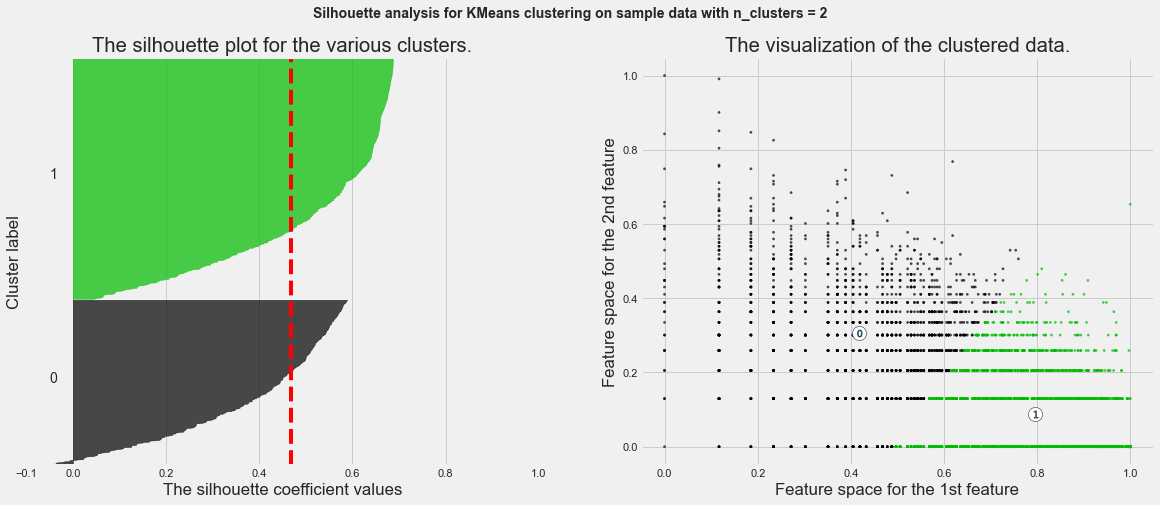

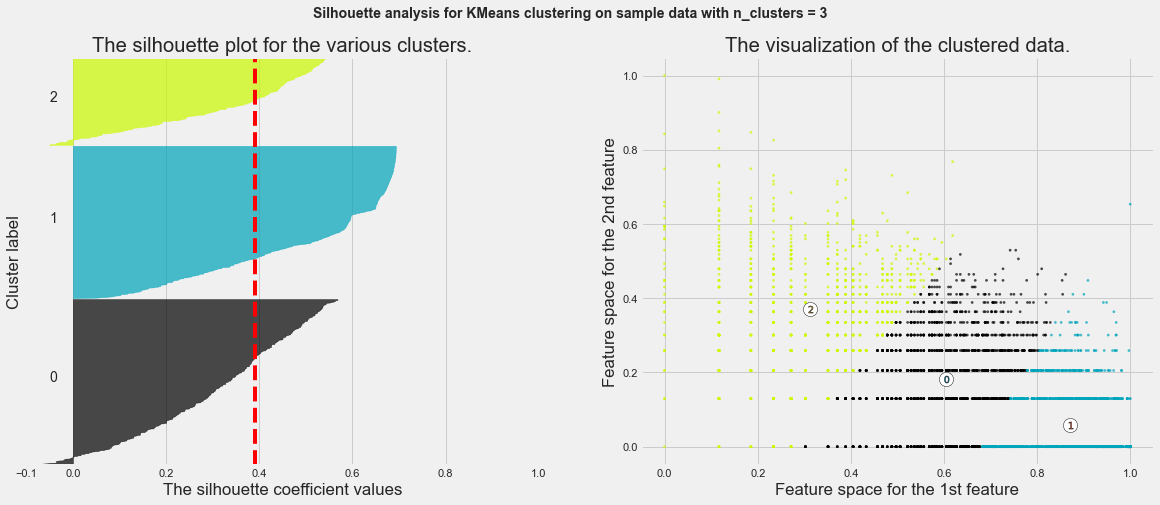

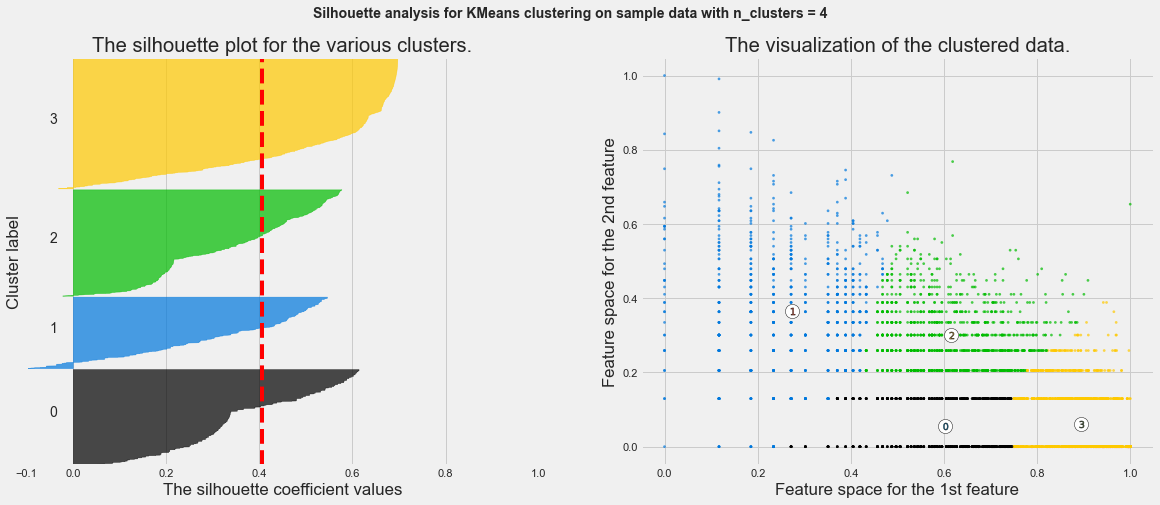

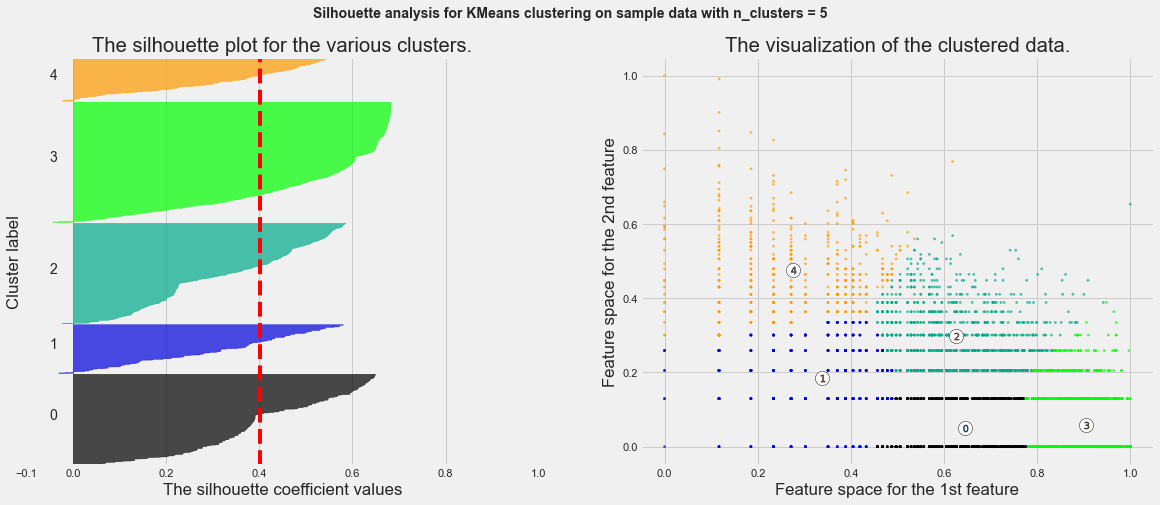

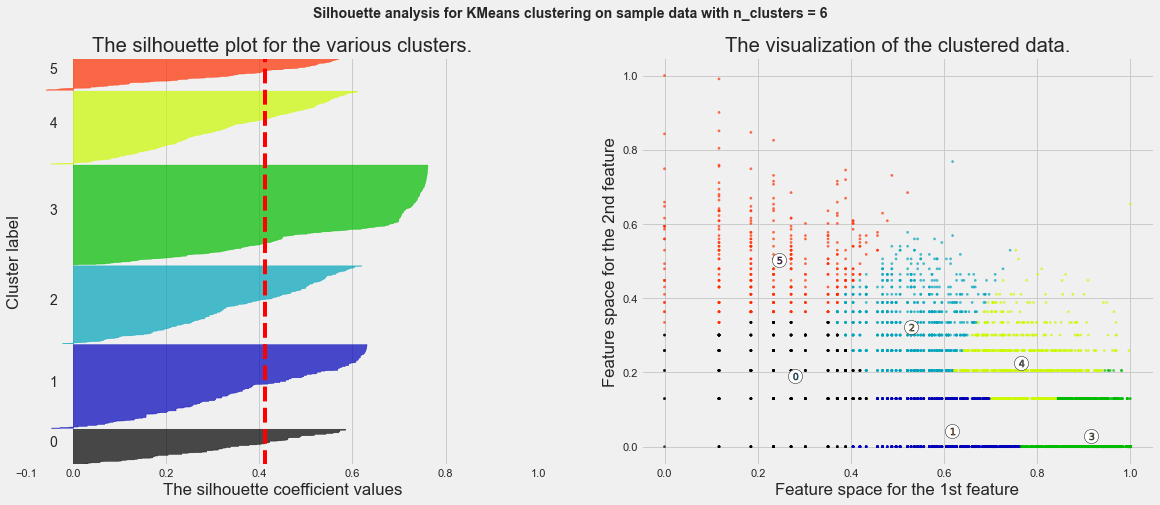

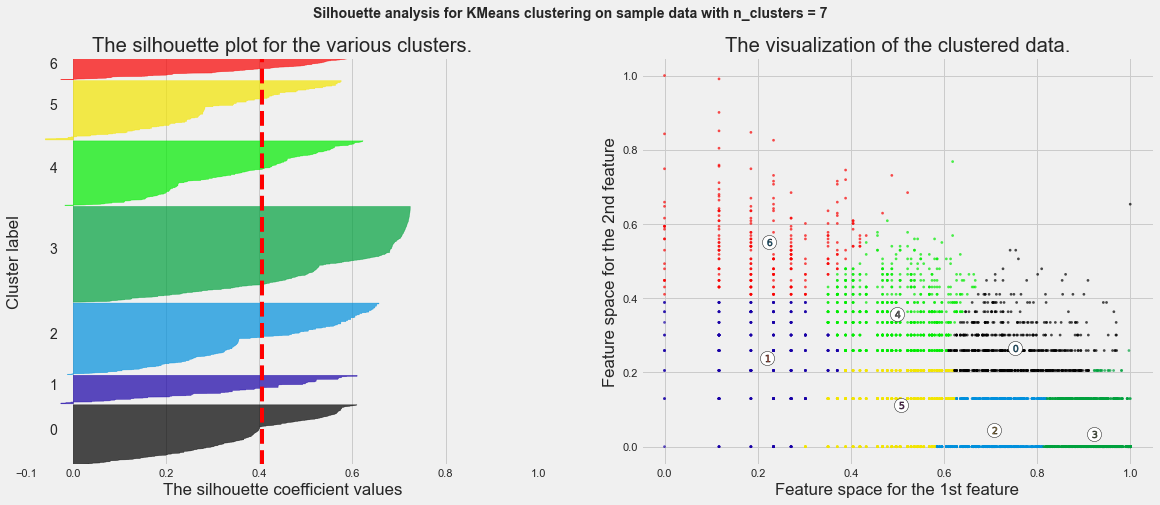

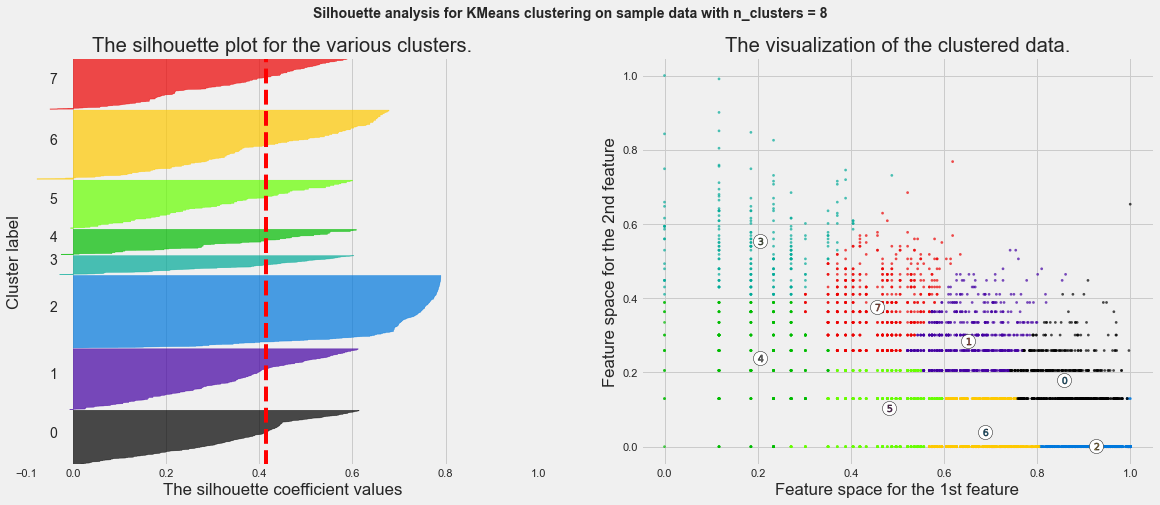

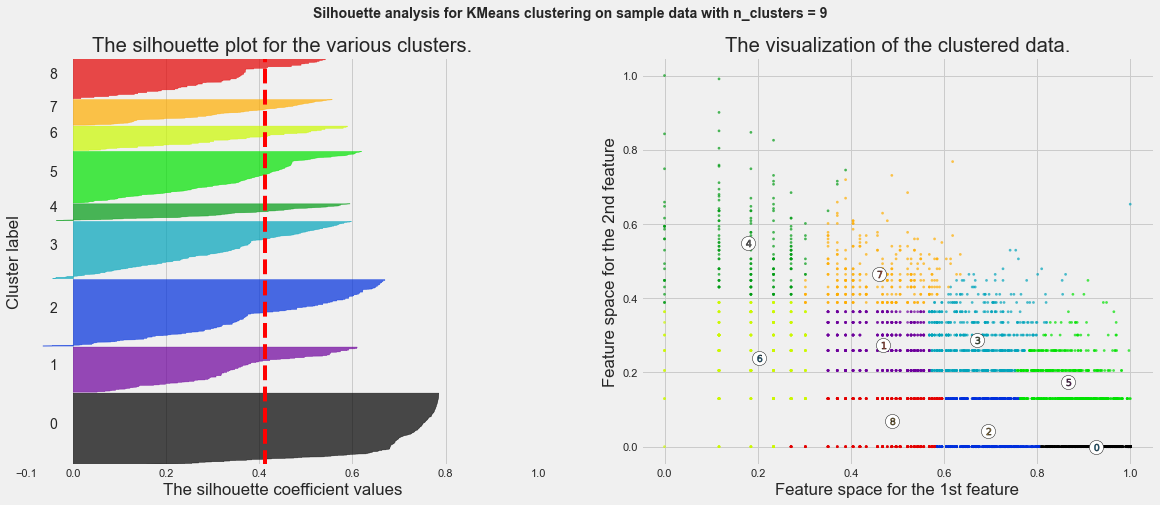

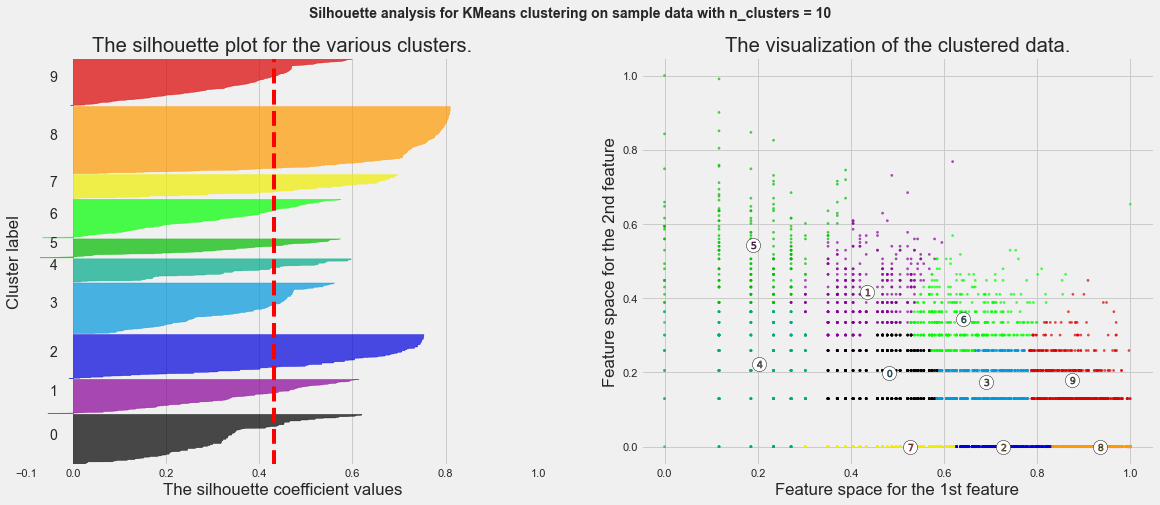

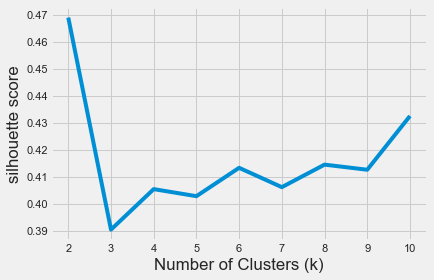

In [436]:
"""
Source: https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891
"""

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(rfm_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(rfm_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rfm_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.savefig('silhouette_analysis.jpg')
plt.show()